In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:

language_types = ["en"]
language_types += ["de", "fr", "it", "vi", "ar", "ro", "sk", "ca", "hr", "bn", "ne", "mr", "kn"]

In [6]:
def map_letters_to_numbers(letter):
    if letter == "2":
        return 1
    if letter == "1":
        return 0
    if letter == "3":
        return 2
    if letter == "4":
        return 3
    return ord(letter) - ord("A")

In [35]:
likelihoods_all = []
checkpoints = ["00500", "01500", "02500", "05000", "10000", "20000", "30000"]
for checkpoint in checkpoints:
    model_path = f"ckpts/sft_arc_full_llama7B/checkpoint_{checkpoint}/hf_model"
    likelihoods_checkpoint = []
    for language in language_types:
        answers = np.load(f"{model_path}/train_pts_{language}_answers.npy")
        answers = list(map(map_letters_to_numbers, answers))
        A_to_D_probs_unnorm = np.load(f"{model_path}/train_pts_{language}_A_to_D_probs_unnorm.npy")
        likelihoods = A_to_D_probs_unnorm[np.arange(len(A_to_D_probs_unnorm)),answers]
        likelihoods_checkpoint.append(likelihoods)
    likelihoods_checkpoint = np.concatenate(likelihoods_checkpoint)
    
    likelihoods_all.append(likelihoods_checkpoint)
likelihoods_all = np.array(likelihoods_all)

In [33]:
answers_all = []
for language in language_types:
    answers = np.load(os.path.join("ckpts/sft_arc_full_llama7B/checkpoint_05000/hf_model", f"{language}_trainpts_correct_all.npy"))
    answers_all.append(answers)
answers_all = np.concatenate(answers_all)

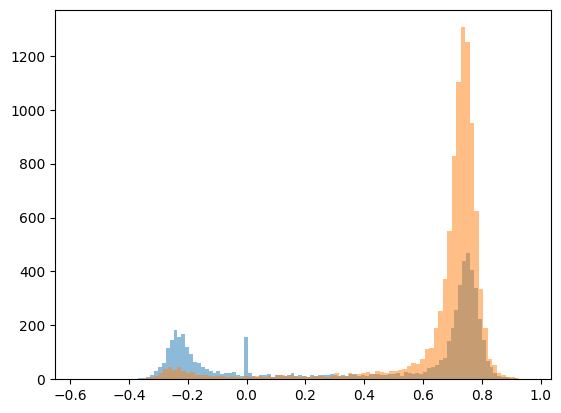

In [34]:
hard_idxs = np.where(answers_all == 0)[0]

plt.hist(likelihoods_all[-1, hard_idxs] - likelihoods_all[0, hard_idxs], bins=100, alpha=0.5,)

easy_idxs = np.where(answers_all == 1)[0]
plt.hist(likelihoods_all[-1, easy_idxs] - likelihoods_all[0, easy_idxs], bins=100, alpha=0.5,)

plt.savefig("delete.jpg")

(6, 15590)

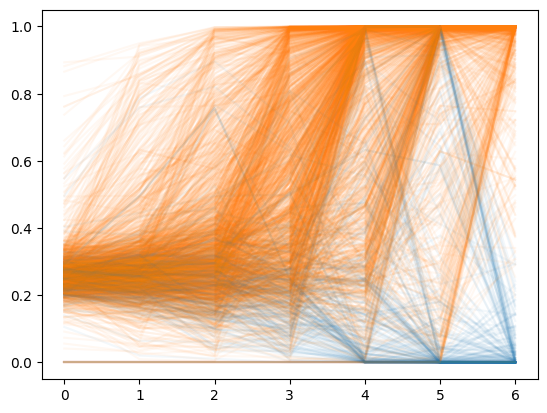

In [ ]:
idxs = np.random.randint(0, 15590, 2000)


for i in range(len(idxs)):
    if likelihoods_all[-1, idxs[i]] < likelihoods_all[0, idxs[i]]:
        plt.plot(likelihoods_all[:, idxs[i]], alpha=0.01, c = "C0")
    else:
        plt.plot(likelihoods_all[:, idxs[i]], alpha=0.01, c = "C1")

plt.savefig("delete.jpg")

In [ ]:

            language_types = ["en"]
            language_types += ["de", "fr", "it", "vi", "ar", "ro", "sk", "ca", "hr", "bn", "ne", "mr", "kn"]
            # language_types = ["ru", "zh", "es", "nl", "id", "hu", "da", "uk", "sr", "hi", "ta", "ml", "te"]
            for language in language_types:
                idxs = np.where(np.array(languages) == language)[0]
                np.save(os.path.join(model_path, f"train_pts_{language}_answers.npy"), answers[idxs])
                np.save(os.path.join(model_path, f"train_pts_{language}_A_to_D_probs_unnorm.npy"), A_to_D_logits_all[idxs])